In [1]:
from experiments.Scheduling.eval import Config, EmuWorld, EmuCloud, EmuDevice
from experiments.Scheduling.visualize import visualize
import matplotlib.pyplot as plt

In [2]:
config = Config()
config.max_draft_tokens = 10
config.max_new_tokens = 99
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
print(world.entities[0].target_tokens)
print(world.entities[1].target_tokens)
print(world.wall_time)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294]
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294]
28.02800000001127


In [15]:
config = Config()
config.method = "synchronized"
config.max_draft_tokens = 10
config.max_new_tokens = 99
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
print(world.entities[0].target_tokens)
print(world.entities[1].target_tokens)
# visualize(config, world)
print(world.wall_time)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207]
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207]
100.00000000011343


Node[1]: Aggregator initialized at 0 s


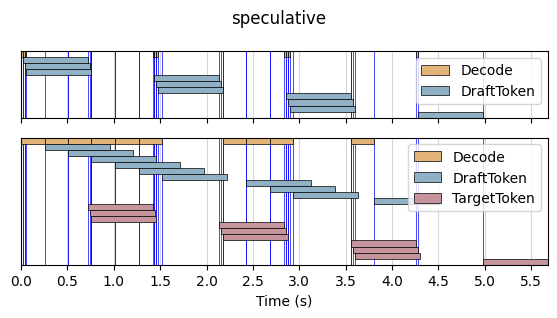

In [4]:
config = Config()
config.max_draft_tokens = 3
config.max_new_tokens = 10
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
figure = visualize(config, world)
# plt.close()

Node[1]: Aggregator initialized at 0 s


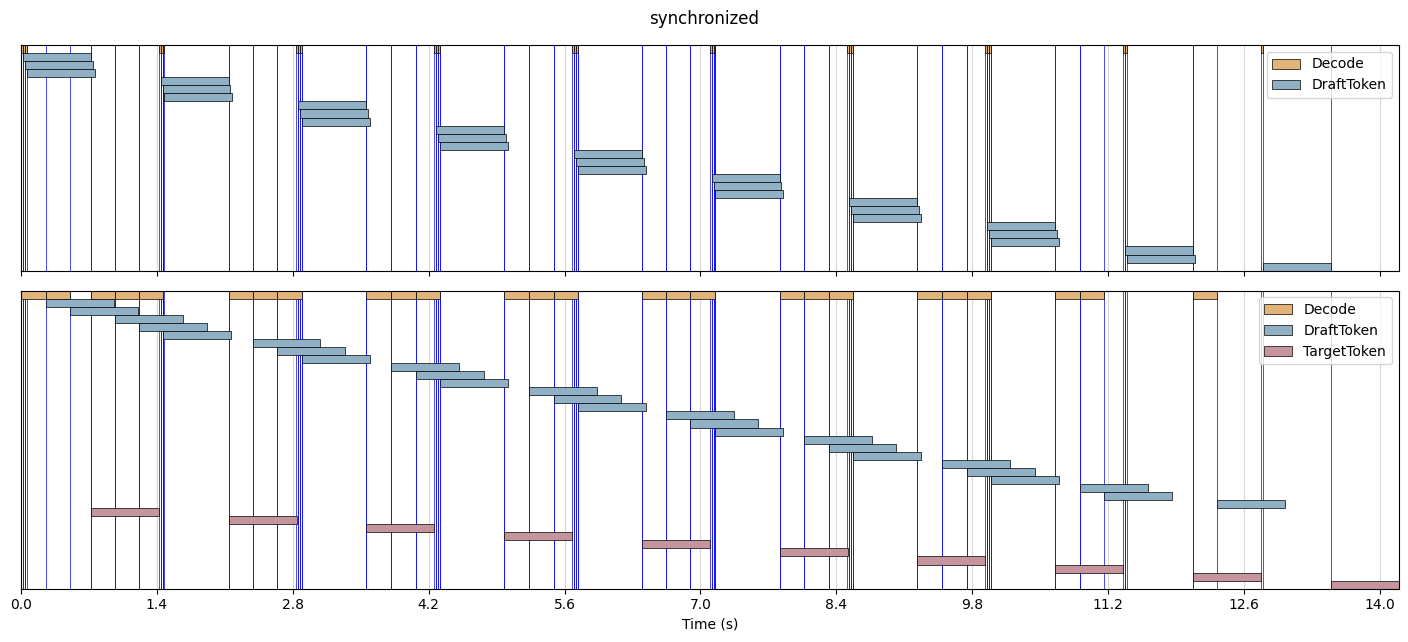

In [5]:
config = Config()
config.method = "synchronized"
config.max_draft_tokens = 3
config.max_new_tokens = 10
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(120)
figure = visualize(config, world)
# plt.close()

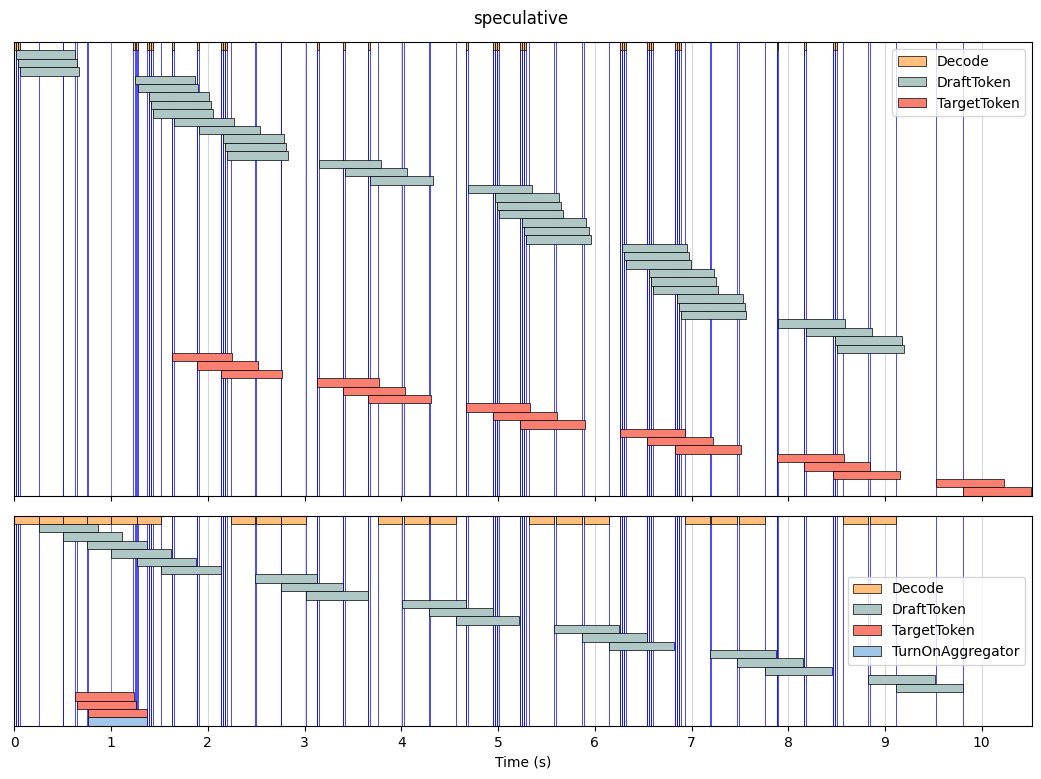

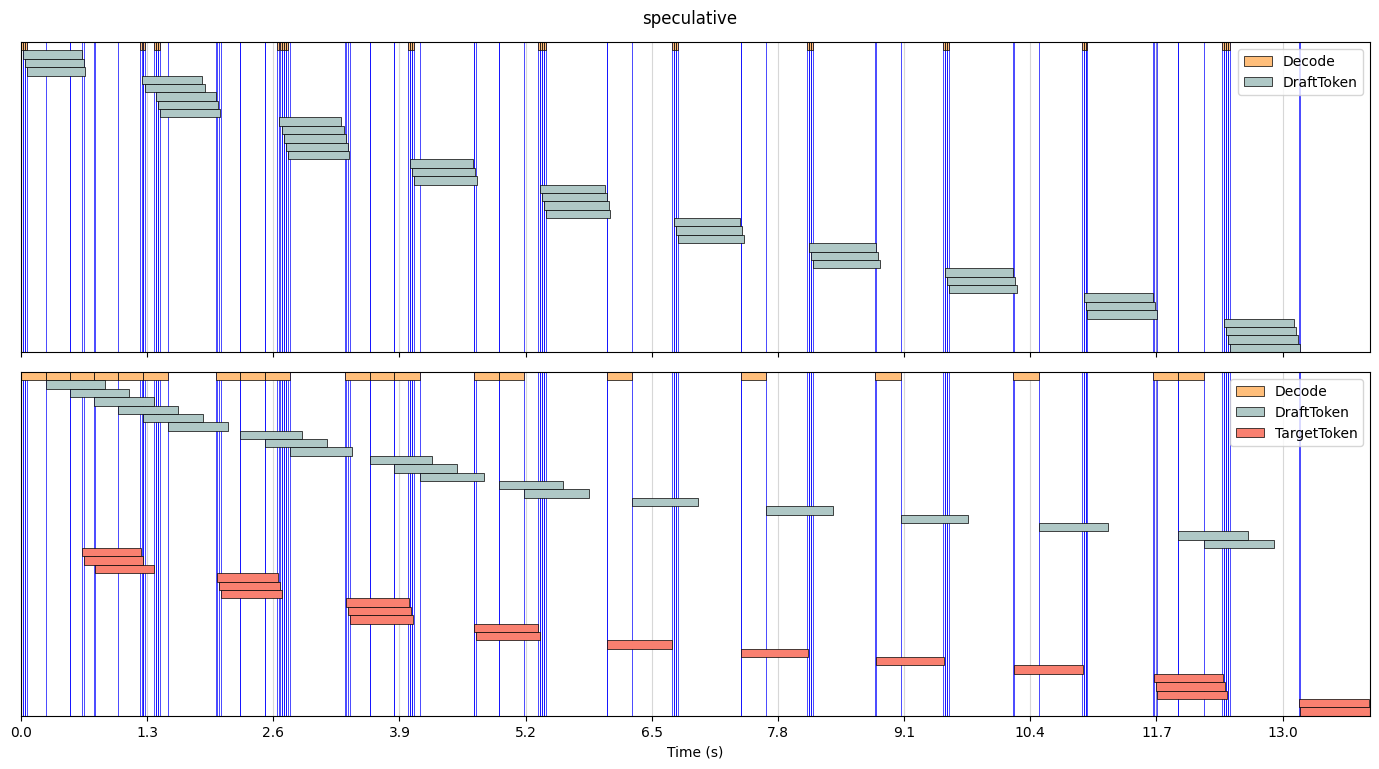

In [6]:
from experiments.Scheduling.eval import Config, EmuWorld, EmuCloud, EmuDevice
from experiments.Scheduling.visualize import visualize
import matplotlib.pyplot as plt
from functools import partial
import numpy as np

def latency_trace(t, latency, jitter):
    np.random.seed(int(t * 100))
    return 0.002 + np.random.uniform(0, 0.006) + latency + np.sin(t / 10) * jitter

latency = 0.6
config = Config()
config.precision = 0.01
config.method = "speculative"
config.scheduler.strategy = 'DRAGON'
config.max_draft_tokens = 3
config.max_new_tokens = 20
world = EmuWorld(config, partial(latency_trace, latency=latency, jitter=latency/5))
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
figure = visualize(config, world)
# figure.savefig('speculative_dragon.png', dpi=300)
figure.show()
# plt.close()

latency = 0.6
config = Config()
config.precision = 0.01
config.method = "speculative"
config.scheduler.strategy = 'never'
config.max_draft_tokens = 3
config.max_new_tokens = 20
world = EmuWorld(config, partial(latency_trace, latency=latency, jitter=latency/5))
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
figure = visualize(config, world)
# figure.savefig('speculative_never.png', dpi=300)
figure.show()
# plt.close()

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[False, True, True, True, True, True, False, True, True, True, False, True, True, True, True]


delta_z(0.80770109835158) = (1 - 0.0) * (0.019756132457405328 - 0.24669488300000353) + (1.0 - 0.0) * 1.0346398488941781
delta_z(-0.4037918492567033) = (1 - 0.5) * (0.2588692929999752 - 0.019756132457405328) + (0.5 - 1.0) * 1.0466968590559764
delta_z(-0.2766279780574419) = (1 - 0.6666666666666666) * (0.25041372199999046 - 0.019756132457405328) + (0.6666666666666666 - 1.0) * 1.0605415237149107
delta_z(-0.21184968834947382) = (1 - 0.75) * (0.24760994799999025 - 0.019756132457405328) + (0.75 - 1.0) * 1.0752525689404802
delta_z(-0.1715263984561587) = (1 - 0.8) * (0.24760994799999025 - 0.019756132457405328) + (0.8 - 1.0) * 1.0854858078233787
delta_z(-0.14292132486534825) = (1 - 0.8333333333333334) * (0.25674972000001617 - 0.019756132457405328) + (0.8333333333333334 - 1.0) * 1.0945215367347005
delta_z(-0.24985503048410207) = (1 - 0.7142857142857143) * (0.2513642859999834 - 0.019756132457405328) + (0.7142857142857143 - 1.0) * 1.1061007602369353
delta_z(-0.21970735414955395) = (1 - 0.75) * (0.2

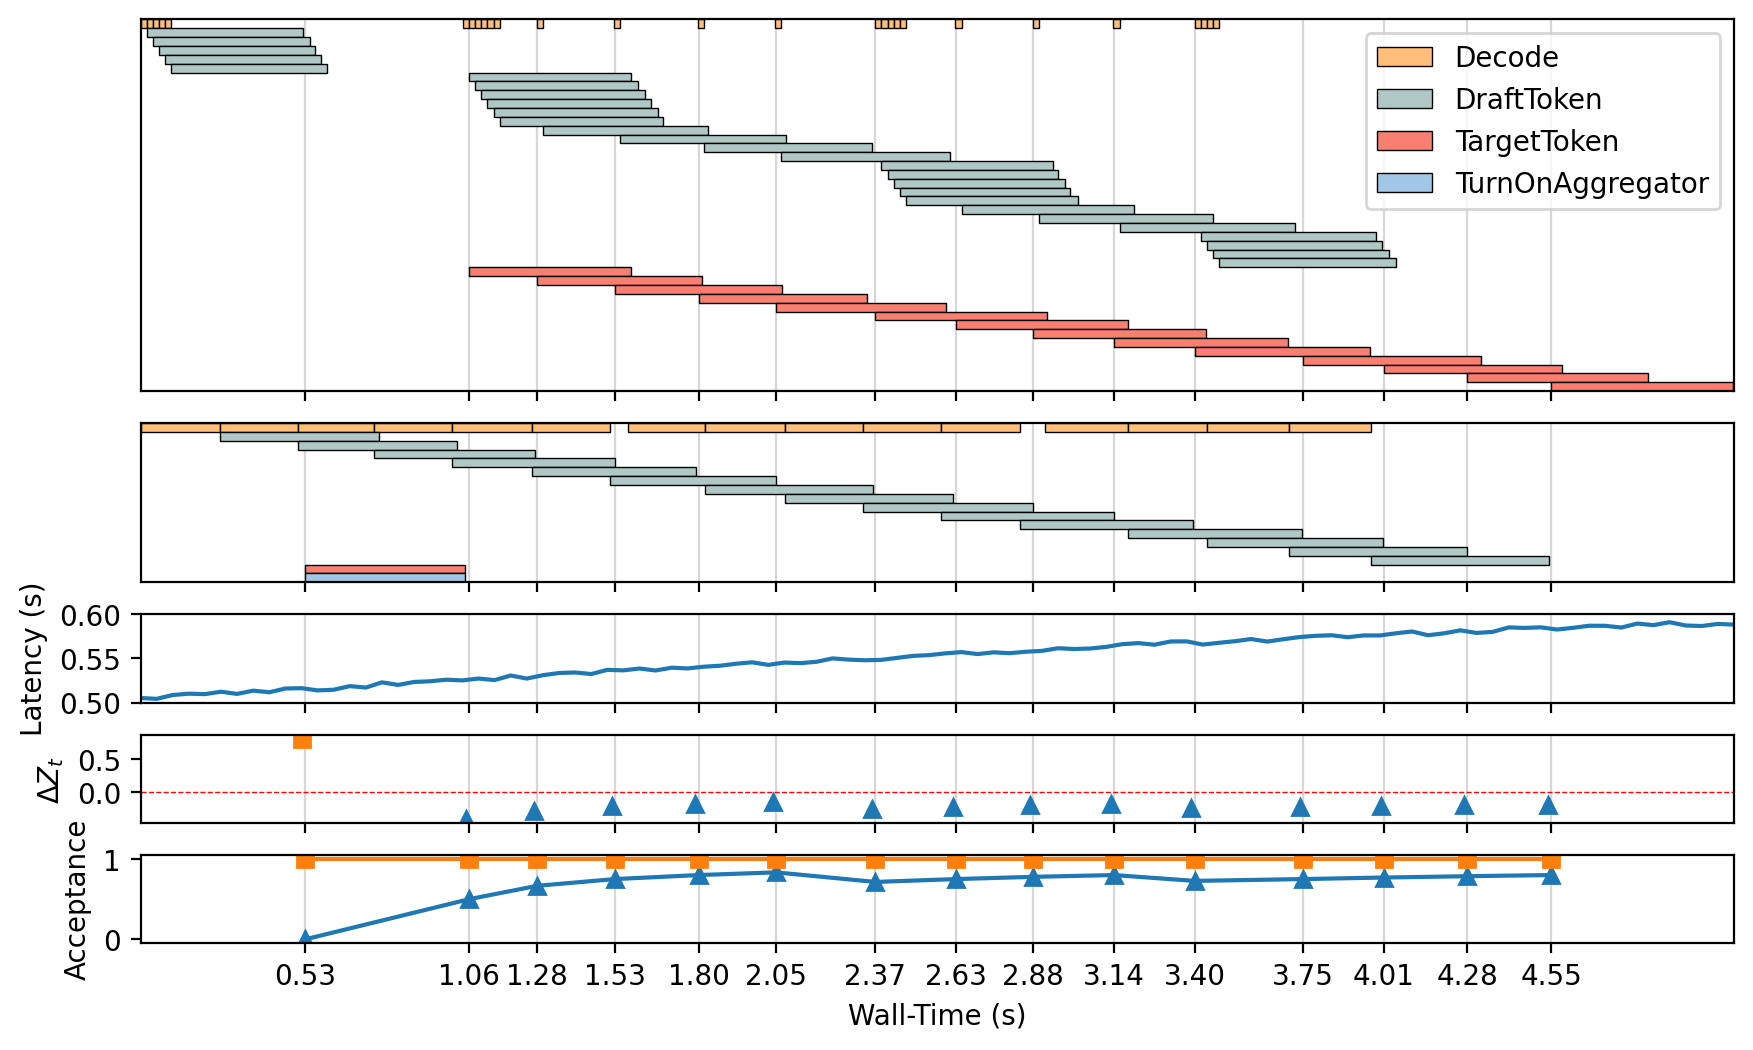

In [ ]:
import json
import sys; sys.path.append(".")
from experiments.Scheduling.simulator import Config, EmuWorld, EmuCloud, EmuDevice, Message
from experiments.Scheduling.simulator import acceptance_stats
from typing import OrderedDict
from functools import partial
import numpy as np

config = Config()
config.max_draft_tokens = 5
config.max_new_tokens = 15
config.precision = 0.01
config.method = "speculative"
config.scheduler.strategy = "dragon"

with open("outputs/Latency-20250330174023/stats.json") as f:
    stats = json.load(f)
acceptance_stats['Cloud'] = stats[0]['AcceptanceLoc'][: config.max_new_tokens]
acceptance_stats['Device'] = stats[0]['AcceptanceRem'][: config.max_new_tokens]

def latency_trace(t: float, latency: float, jitter: float):
    np.random.seed(int(t * 100))
    return 0.002 + np.random.uniform(0, 0.006) + latency + np.sin(t / 5) * jitter

np.random.seed(42)
network_latency = partial(latency_trace, latency=0.5, jitter=0.1)
world = EmuWorld(config, network_latency)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)

with open("scheduling_case.pkl", "wb") as f:
    json.dump(world, f)

from matplotlib import patches
import matplotlib.pyplot as plt

colors = {
    "Decode": '#FFBE7A',
    Message.DRAFT: '#AFC8C6',
    Message.TARGET: '#F98070',
    Message.TURNON_AGGREGATOR: '#A1C6E7'
}
auxiliary_vline_color = "blue"
bar_height = 0.1

def visualize(config: Config, world: EmuWorld):
    records = OrderedDict({
        title: [[], []] for title in ["Decode", Message.DRAFT, Message.TARGET, Message.TURNON_AGGREGATOR]
    })
    for record in world.records:
        src_id = record.meta.get('src_id', record.meta.get('rank'))
        records[record.title][src_id].append((record.beg_time, record.duration))
    total_records = [sum([len(items[src_id]) if title != "Decode" else 1 for title, items in records.items()]) for src_id in (0, 1)]
    
    figure, axes = plt.subplots(
        nrows=5, ncols=1, sharex=True, 
        figsize=(world.wall_time * 2, sum(total_records) / 10), 
        gridspec_kw={
            'height_ratios': total_records + [10, 10, 10]
        }, 
        dpi=200
    )
    for src_id in (0, 1):
        cum_height = 0
        for title, items in records.items():
            for beg_time, duration in items[src_id]:
                if title != "Decode":
                    cum_height -= bar_height
                axes[src_id].add_patch(patches.Rectangle(
                    xy=(beg_time, cum_height), width=duration, height=bar_height, 
                    edgecolor='black', facecolor=colors[title], linewidth=0.5, zorder=2, label=title))
        axes[src_id].set_yticks([])
        axes[src_id].set_ylim(cum_height, bar_height)
        axes[src_id].set_xticks(np.arange(0, world.wall_time, int(10 * (world.wall_time / 10)) / 10))
        axes[src_id].set_xlim(0, world.wall_time)
        axes[src_id].grid(zorder=1, alpha=0.5)
    axes[0].set_ylabel("Device-Side Pipeline", fontproperties=font)
    axes[1].set_ylabel("Cloud-Side Pipeline")
    handles, labels = axes[1].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axes[0].legend(by_label.values(), by_label.keys())
    # auxiliary_vlines = list(set([patch.get_x() for patch in axes[0].patches] + [patch.get_x() for patch in axes[1].patches]))
    # for ax in axes[: -3]:
    #     for x in auxiliary_vlines:
    #         ax.vlines(x, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color=auxiliary_vline_color, linestyle='-', lw=0.5, zorder=1)

    # Network latency
    wall_time_axis = np.linspace(0, world.wall_time, num=100)
    axes[2].plot(wall_time_axis, [latency_trace(t, 0.5, 0.1) for t in wall_time_axis])
    axes[2].set_ylim(0.5, 0.6)
    axes[2].set_ylabel('Latency (s)')

    # Scheduling strategy output
    if world.get_entity_by_id(0).scheduler.delta_zs:
        wall_time_axis, delta_zs = list(zip(*world.get_entity_by_id(0).scheduler.delta_zs))
        axes[3].plot(wall_time_axis, delta_zs, marker='^', linestyle='none', label="Cloud")
    if world.get_entity_by_id(1).scheduler.delta_zs:
        wall_time_axis, delta_zs = list(zip(*world.get_entity_by_id(1).scheduler.delta_zs))
        axes[3].plot(wall_time_axis, delta_zs, marker='s', linestyle='none', label="Device")
    axes[3].hlines(y=0, xmin=0, xmax=world.wall_time, color='red', linestyle='--', lw=0.5)
    axes[3].set_ylabel('$\Delta Z_t$')
    
    wall_time_axis = []
    for src_id in (0, 1):
        cum_height = 0
        for title, items in records.items():
            for beg_time, duration in items[src_id]:
                if title == Message.TARGET:
                    wall_time_axis.append(beg_time)
    wall_time_axis = sorted(wall_time_axis)
    for ax in axes:
        ax.set_xticks(wall_time_axis)
        ax.grid(axis='x', zorder=1, alpha=0.5)
    acceptance_cloud = []
    acceptance_device = []
    for i in range(1, len(acceptance_stats['Cloud']) + 1):
        acceptance_cloud.append(np.mean(acceptance_stats['Cloud'][: i]))
        acceptance_device.append(np.mean(acceptance_stats['Device'][: i]))
    axes[4].plot(wall_time_axis, acceptance_cloud, label='Cloud Acceptance Stats (Mean)', marker='^')
    axes[4].plot(wall_time_axis, acceptance_device, label='Device Acceptance Stats', marker='s')
    axes[4].set_ylabel('Acceptance')
    axes[4].set_xlabel('Wall-Time (s)')
    return figure

figure = visualize(config, world)
figure.show()
